In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import pickle
import streamlit as st
import numpy as np
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

**GROUP 5 MEMBERS**

1.Bob Tumushiime

2.Erieza Kakungulu

3.Collin Nahurira Blessing

4.Salwa Namatovu Kasozi

5.Jennifer Namuyomba Mwesigwa

6.Faith Mbasani Apio

7.Irene Karungi


**QUESTION 1**

Problem Statement

We will focus on a classification problem where the goal is to accurately predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.. High recall is crucial here as missing a positive case (false negative) could have serious implications.

In [ ]:
# Load the Pima Indians Diabetes dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

In [ ]:
data.head()

In [4]:
data.shape

(768, 9)

The dataset includes data from 768 female patients of Pima Indian heritage and contains the following features:

Number of pregnancies

Plasma glucose concentration a 2 hours in an oral glucose tolerance test

Diastolic blood pressure (mm Hg)

Triceps skinfold thickness (mm)

2-Hour serum insulin (mu U/ml)

Body mass index (weight in kg/(height in m)^2)

Diabetes pedigree function

Age (years)

**Objective**

The objective is to build a classification model that can predict the 'Outcome' (whether a patient has diabetes) with the highest possible recall_macro score. This means we aim to correctly identify as many positive cases (patients with diabetes) as possible.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Split the dataset into features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Dataset loaded and prepared for model training.')

Dataset loaded and prepared for model training.


Next, we will proceed with building the best model and use GridSearchCV to optimize the model for the best recall_macro score.

In [8]:
# Create a default Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [9]:
# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)

In [10]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = log_reg.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic


### saving the trained model

In [11]:
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(log_reg, file)

### loading the model

In [12]:
with open('logistic_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [13]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic


In [14]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [15]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727
F1 Score: 0.6607142857142857


In [16]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

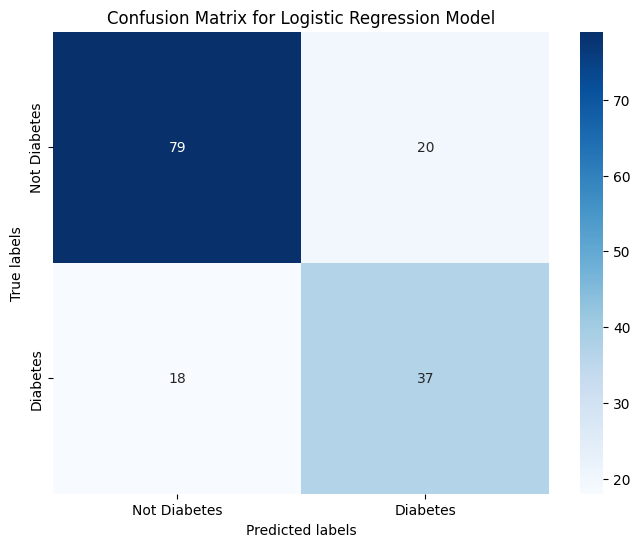

In [17]:
#Visualizing the Confusion Matrix for default model
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Diabetes', 'Diabetes'], yticklabels=['Not Diabetes', 'Diabetes'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

The confusion matrix provides a detailed breakdown of the model's predictions:

True negatives (TN): 79

False positives (FP): 20

False negatives (FN): 18

True positives (TP): 37

The model shows a reasonable balance between precision and recall, with a recall of approximately 67.27%, which is crucial for our objective of optimizing recall. The accuracy and F1 score also provide a comprehensive view of the model's overall performance.

In [18]:
# Define the parameter grid
param_grid = {
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.logspace(-4, 4, 9),
    'class_weight': [None, 'balanced'],
    'l1_ratio': np.linspace(0, 1, 10)  # Only used with 'elasticnet' penalty
}

In [19]:
# Define the model
model = LogisticRegression(max_iter=10000)

In [20]:
# Define the scorer
scorer = make_scorer(recall_score, average='macro')

In [21]:
# Setup GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring=scorer, cv=3, verbose=1, n_jobs=-1)

In [22]:
# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04]),
                         'class_weight': [None, 'balanced'],
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']},
             scoring=make_scorer(recall_score, response_method='predict', average=macro),
             verbose=1)

In [23]:
# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best parameters:', best_params)
print('Best recall_macro score:', best_score)

Best parameters: {'C': 0.1, 'class_weight': 'balanced', 'l1_ratio': 0.2222222222222222, 'penalty': 'elasticnet', 'solver': 'saga'}
Best recall_macro score: 0.7576983240105729


These results indicate that the best performing model uses the 'saga' solver with an 'elasticnet' penalty, a C value of 0.1, a class weight of 'balanced', and an l1_ratio of approximately 0.222. This configuration achieved a recall_macro score of approximately 0.758, indicating an improvement in the model's ability to identify positive cases of diabetes across both classes.

In [24]:
# Evaluate the tuned logistic regression model
lr_tuned = LogisticRegression(C=0.1, class_weight='balanced', l1_ratio=0.2222222222222222, penalty='elasticnet', solver='saga', random_state=42, max_iter=10000)
lr_tuned.fit(X_train_scaled, y_train)

# Predictions
y_pred_tuned = lr_tuned.predict(X_test_scaled)

# Evaluation
print(classification_report(y_test, y_pred_tuned))
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
print('Confusion Matrix for Tuned Model:\
', conf_matrix_tuned)

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        99
           1       0.56      0.73      0.63        55

    accuracy                           0.70       154
   macro avg       0.69      0.71      0.69       154
weighted avg       0.73      0.70      0.71       154

Confusion Matrix for Tuned Model: [[68 31]
 [15 40]]


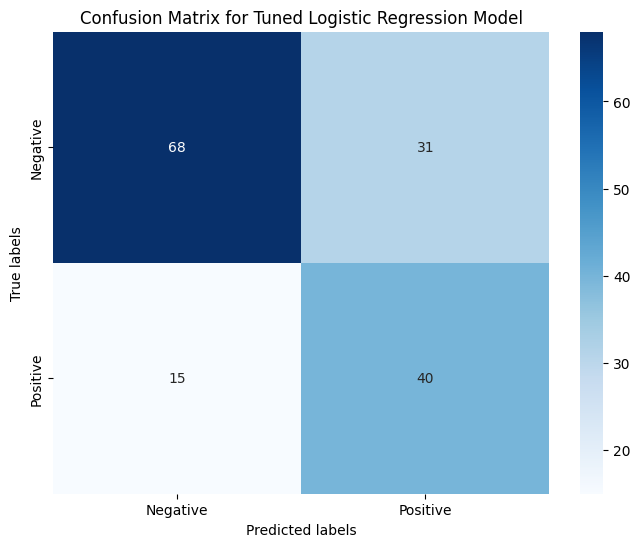

In [25]:
#Visualizing the Confusion Matrix for tuned model
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Tuned Logistic Regression Model')
plt.show()

The tuned model shows a different performance trade-off compared to the default model. While the recall for class 1 (indicating the model's ability to identify positive cases) has improved from 0.67 to 0.73, the overall accuracy has decreased from 75% to 70%. The precision for class 0 has slightly increased, but the model now has a higher number of false positives (31 compared to 20 in the default model), as indicated by the confusion matrix.

This demonstrates the effect of tuning the model towards a higher recall for the positive class, which can be particularly important in medical diagnostics where missing a positive case can have serious consequences. However, this comes at the cost of overall accuracy and an increase in false positives.



The best-tuned model was achieved with the following combination of hyperparameters:

C (Inverse of regularization strength): 0.1

Class Weight: 'balanced'

l1_ratio (Elastic Net Mixing Parameter): Approximately 0.222

Penalty: 'elasticnet'

Solver: 'saga'

This combination led to the best recall_macro score, indicating an optimized balance between recall for both classes in the dataset.

**QUESTION 2**

In [26]:
df = pd.read_csv(r'C:\Users\robert.tumushiime\OneDrive - ubos.org\Data Capability\AI &ML Class\Customer Data.csv')

In [27]:
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [28]:
df.shape

(850, 10)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [30]:
df.isnull().sum()

Unnamed: 0           0
Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [31]:
impute = KNNImputer()

for i in df.select_dtypes(include='number').columns:
    df[i]=impute.fit_transform(df[[i]])

In [32]:
df.isnull().sum()

Unnamed: 0         0
Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [33]:
df.duplicated().sum()

0

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,850.0,424.500000,245.518160,0.000,212.25000,424.500,636.750000,849.000
Customer Id,850.0,425.500000,245.518160,1.000,213.25000,425.500,637.750000,850.000
Age,850.0,35.029412,8.041432,20.000,29.00000,34.000,41.000000,56.000
Edu,850.0,1.710588,0.927784,1.000,1.00000,1.000,2.000000,5.000
Years Employed,850.0,8.565882,6.777884,0.000,3.00000,7.000,13.000000,33.000
Income,850.0,46.675294,38.543054,13.000,24.00000,35.000,55.750000,446.000
Card Debt,850.0,1.576820,2.125843,0.012,0.38250,0.885,1.898500,20.561
Other Debt,850.0,3.078773,3.398799,0.046,1.04575,2.003,3.903250,35.197
Defaulted,850.0,0.261429,0.398995,0.000,0.00000,0.000,0.261429,1.000
DebtIncomeRatio,850.0,10.171647,6.719441,0.100,5.10000,8.700,13.800000,41.300


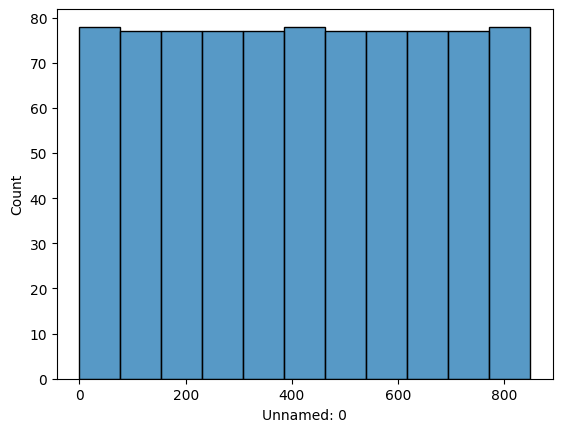

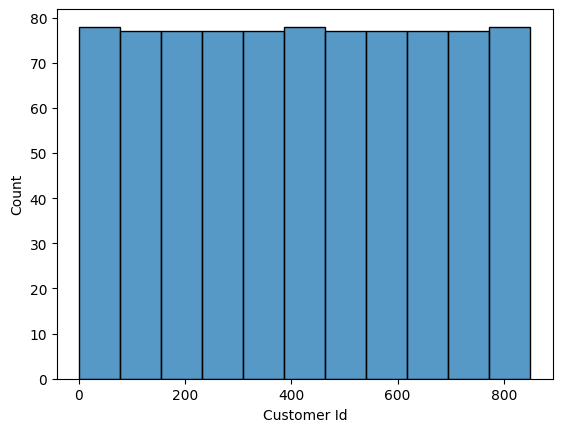

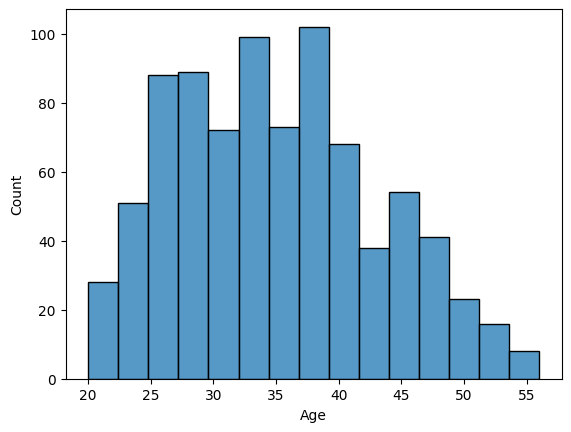

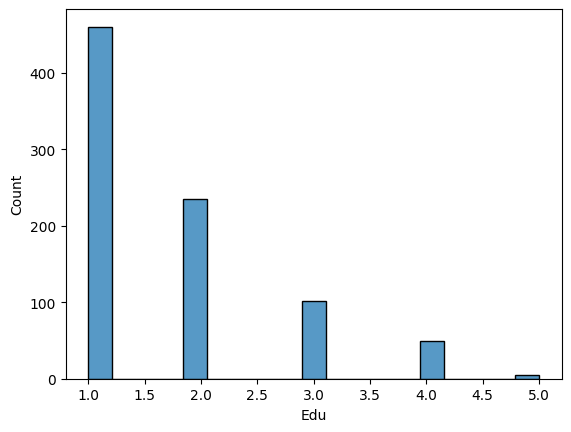

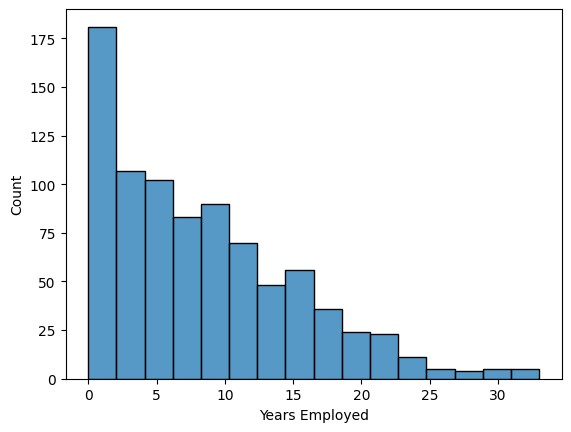

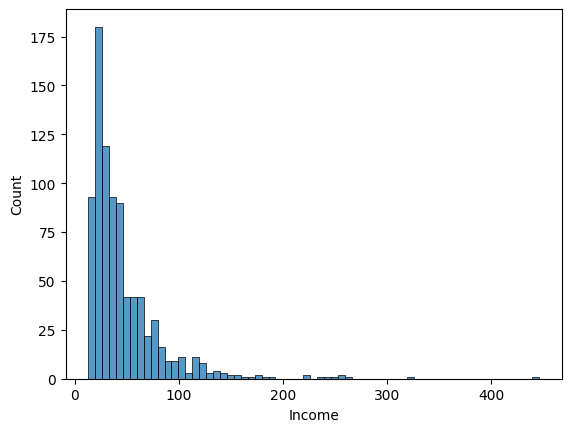

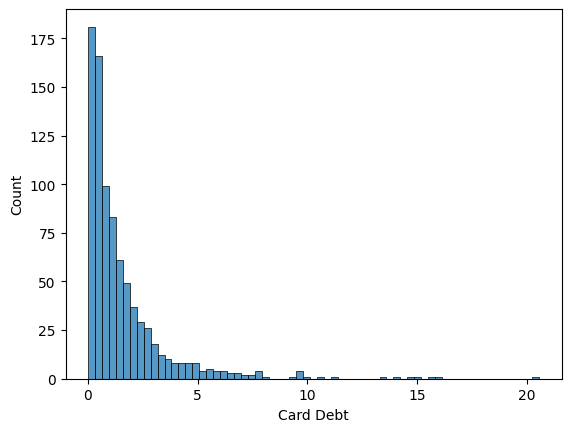

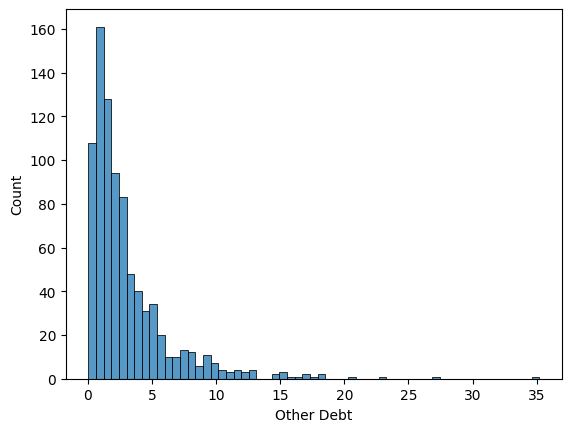

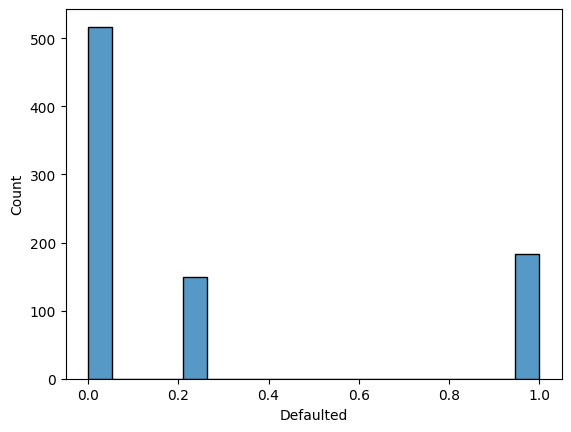

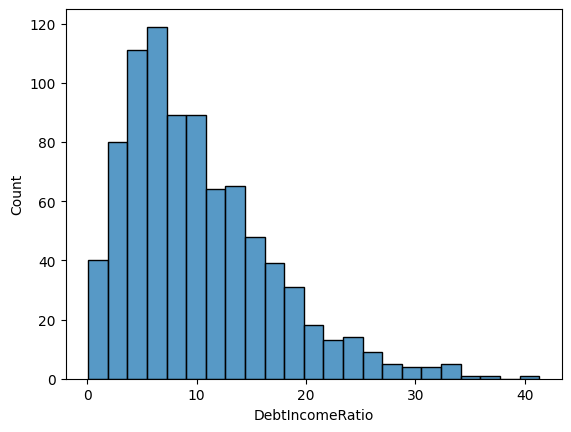

In [35]:
#histogram to show distribution of numerical columns

for i in df.select_dtypes(include='number').columns:
    sns.histplot(data=df,x=i)
    plt.show()

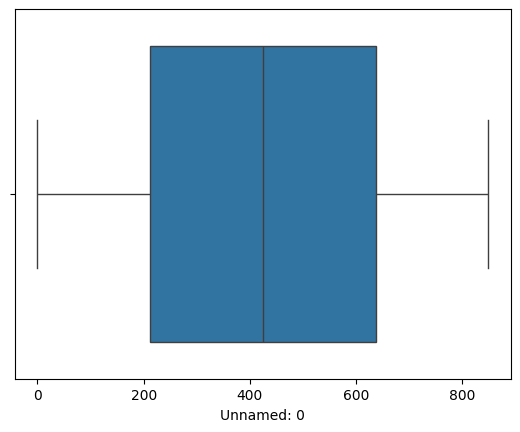

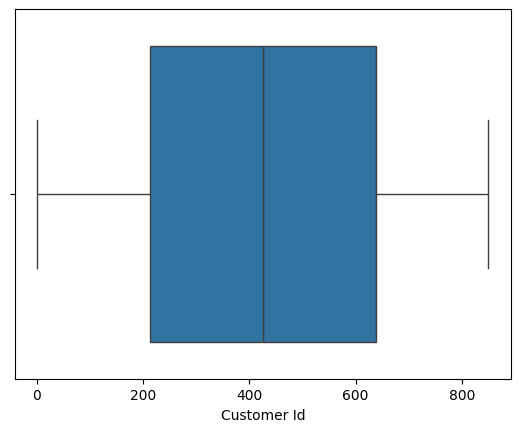

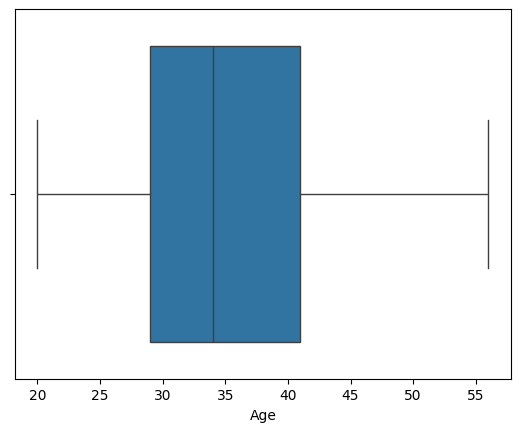

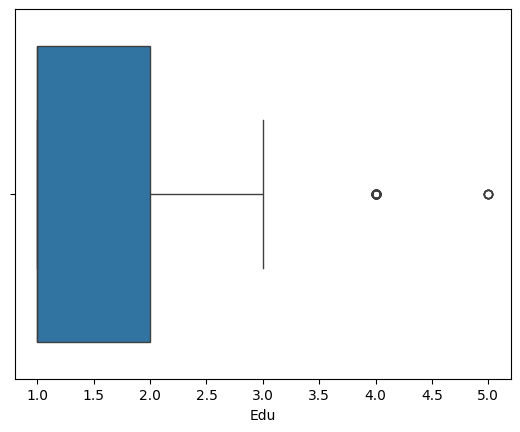

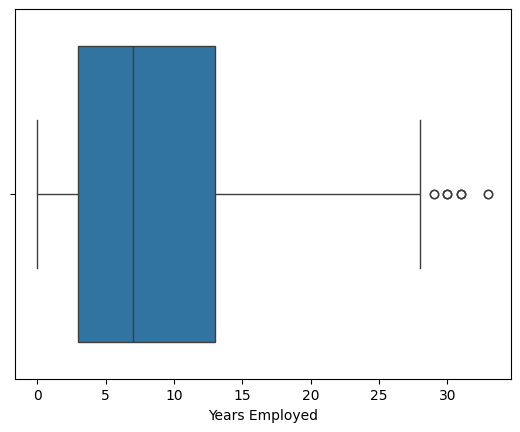

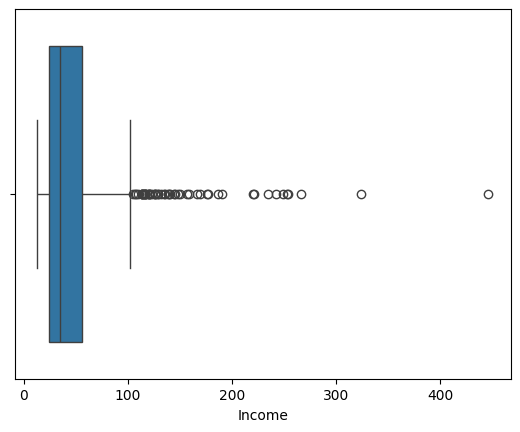

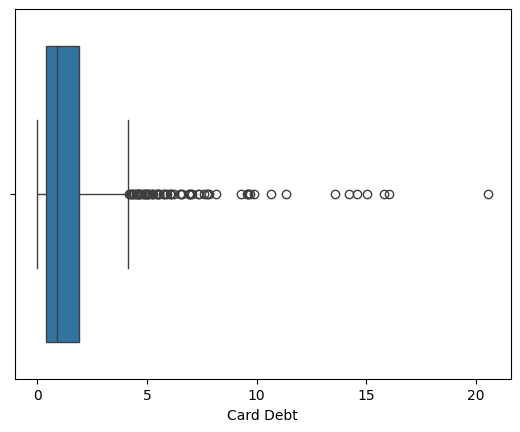

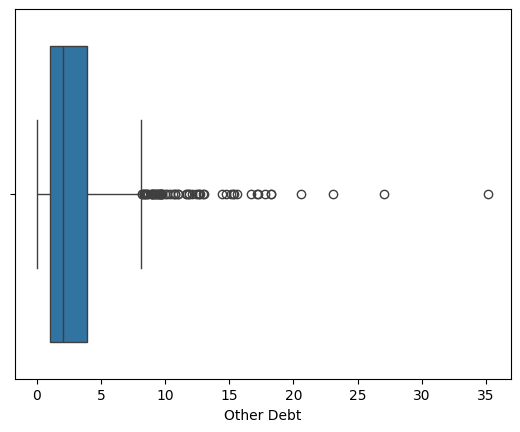

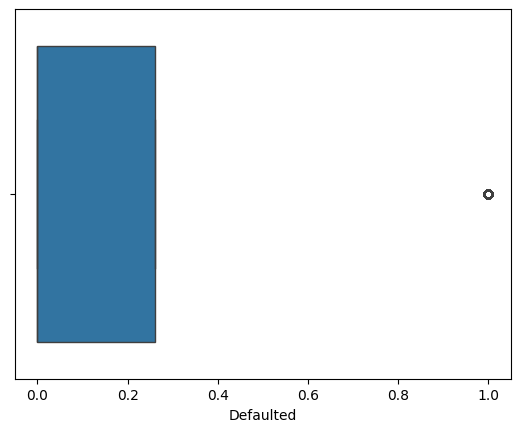

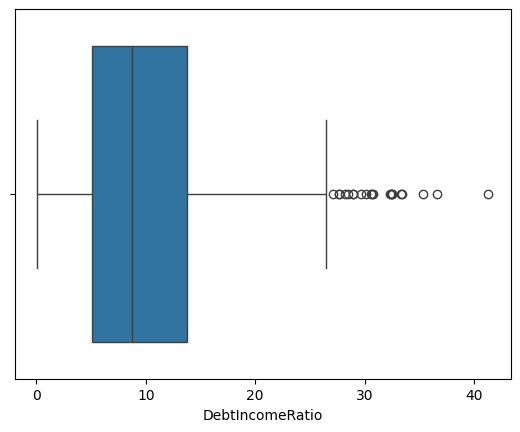

In [36]:
#Box Plot to identify any outliers

for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [37]:
df.columns

Index(['Unnamed: 0', 'Customer Id', 'Age', 'Edu', 'Years Employed', 'Income',
       'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio'],
      dtype='object')

In [38]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [39]:
for i in ['Income','Card Debt', 'Other Debt','DebtIncomeRatio']:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

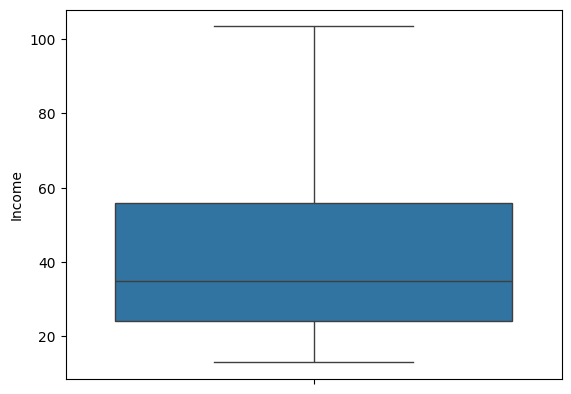

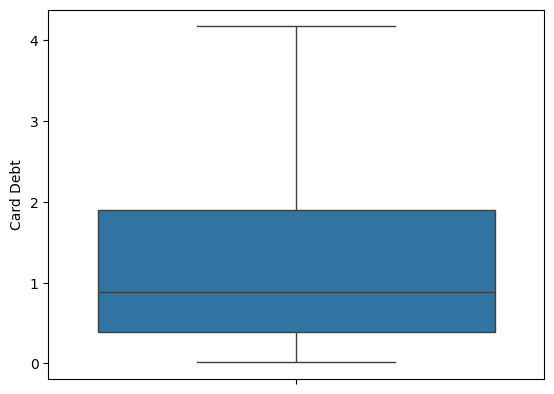

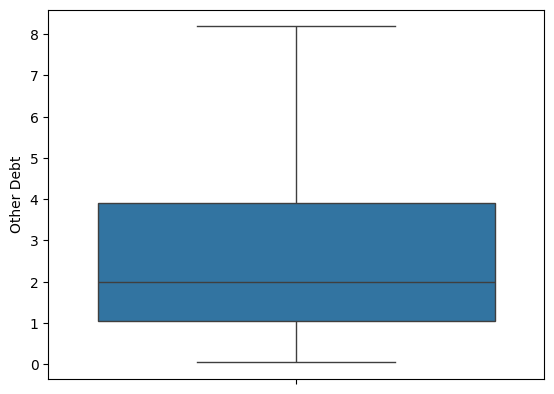

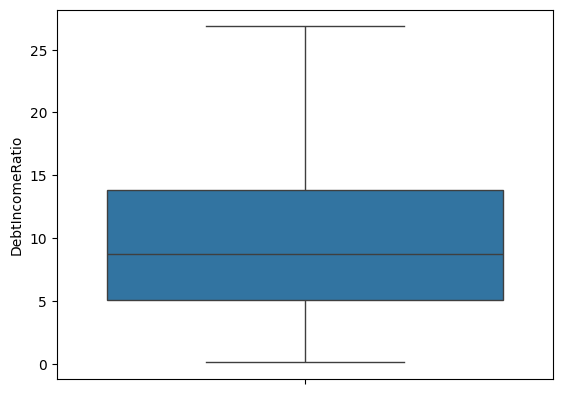

In [40]:
for i in ['Income','Card Debt', 'Other Debt','DebtIncomeRatio']:
    sns.boxplot(df[i])
    plt.show()

In [41]:
# Dropping the 'Unnamed: 0' and 'Customer Id' columns as they are not needed for clustering

df.drop(['Unnamed: 0', 'Customer Id'], axis=1, inplace=True)

In [42]:
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41.0,2.0,6.0,19.000,0.1240,1.0730,0.0,6.3
1,47.0,1.0,26.0,100.000,4.1725,8.1895,0.0,12.8
2,33.0,2.0,10.0,57.000,4.1725,5.8020,1.0,20.9
3,29.0,2.0,4.0,19.000,0.6810,0.5160,0.0,6.3
4,47.0,1.0,31.0,103.375,4.1725,8.1895,0.0,7.2


In [43]:
# Scaling the features

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [44]:
# Determine the optimal number of clusters using the Elbow Method

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

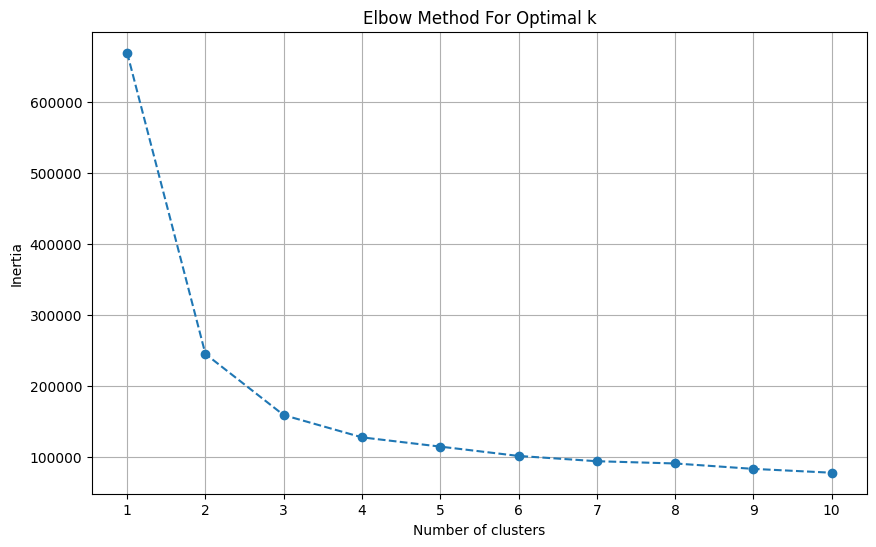

In [45]:
# Plotting the Elbow Method graph

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

The "elbow" point on the graph is where the rate of decrease in the inertia (within-cluster sum of squares) sharply changes. This point indicates that adding more clusters beyond this number will not result in significantly better modeling of the data.

In the graph above, the elbow point appears to be at 3. This suggests that the optimal number of clusters for your dataset is 3, as the inertia starts to decrease at a slower rate after this point.

****Performing K-Means clustering on the customer data with 3 clusters and then analyzing the characteristics of each cluster.****

In [46]:
# Applying K-Means clustering with 3 clusters

kmeans_3 = KMeans(n_clusters=3, random_state=42)
clusters_3 = kmeans_3.fit_predict(df)

# Adding the cluster labels to the original data

df['Cluster3'] = clusters_3

# Display the first few rows of the dataframe with cluster labels
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster3
0,41.0,2.0,6.0,19.000,0.1240,1.0730,0.0,6.3,2
1,47.0,1.0,26.0,100.000,4.1725,8.1895,0.0,12.8,1
2,33.0,2.0,10.0,57.000,4.1725,5.8020,1.0,20.9,0
3,29.0,2.0,4.0,19.000,0.6810,0.5160,0.0,6.3,2
4,47.0,1.0,31.0,103.375,4.1725,8.1895,0.0,7.2,1


****Below are analytical visualizations to explore statistics for each feature for each cluster. This helps in understanding the distinct characteristics of each cluster****

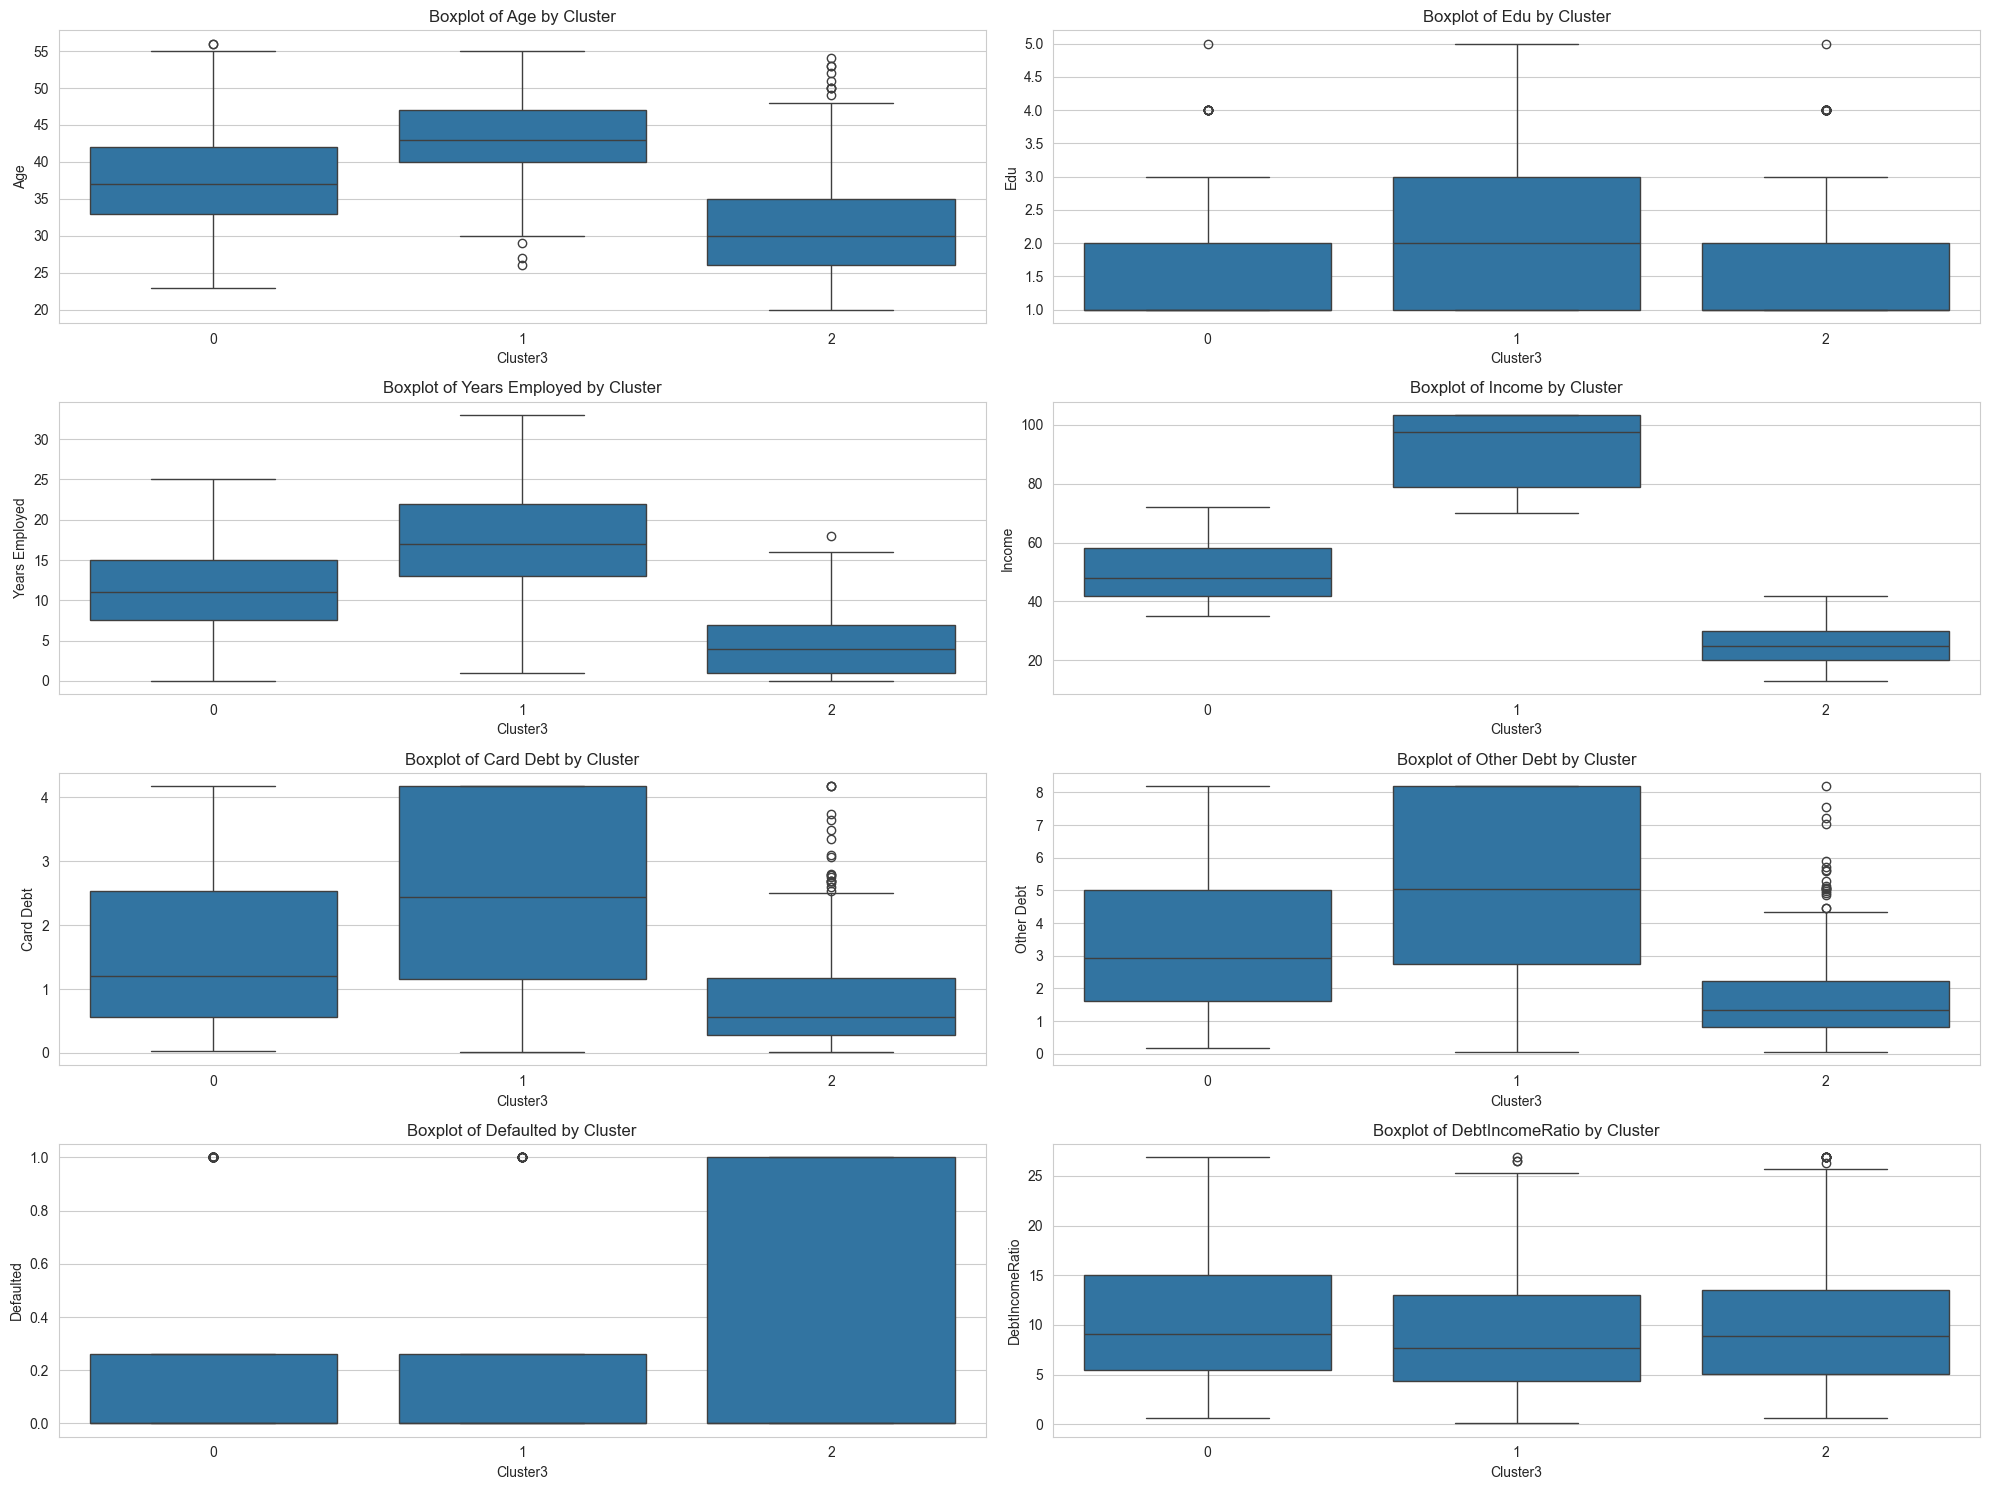

In [47]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a list of features to plot
features = ['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio']

# Initialize the figure
plt.figure(figsize=(20, 15))

# Loop through each feature and create a subplot for each
for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x='Cluster3', y=feature, data=df)
    plt.title('Boxplot of ' + feature + ' by Cluster')

plt.tight_layout()
plt.show()

**Cluster 0**

Characteristics: Individuals in this cluster have moderate to high levels of income and years of employment. They have high levels of debt and other debt.This suggests a conservative approach to debt and strong financial management.


Insight: Cluster  could be made up of middle-aged or senior professionals who have established careers. They likely prioritize financial stability and have a conservative approach to managing debt.


**Cluster 1**

Characteristics: Members of this cluster have higher levels of education and income compared to other clusters. They also have higher levels of debt, both card and other debts, but manage to maintain a relatively low default rate. This suggests that despite their higher debt levels, they have the financial literacy and income to manage and service their debts effectively.

Insight: Cluster 1 likely consists of well-educated, high-earning individuals who are comfortable with leveraging debt as part of their financial management strategy. They could be established professionals or individuals in high-paying jobs.

**Cluster 2**

Characteristics: This cluster seems to represent younger individuals with lower years of employment and income levels. Both cluster 0 and 2 have lower education levels. Their debt levels, both card and other debts, are relatively low, which might indicate cautious financial behavior or limited access to credit. The default rate is high, suggesting poor financial management.

Insight: Cluster 2 could represent young professionals or recent graduates who are early in their careers. They are cautious with their finances, possibly due to a lower disposable income.


**Recommendations**

Cluster 0: Established Professionals with Conservative Financial Behavior

Recommendation:  Promote credit cards that offer investment rewards, higher savings rates, and benefits that match their interest in financial stability and growth. Cards that contribute to retirement funds or offer stock options might be particularly attractive.

Cluster 1: High Income Earners with High Debt

Recommendation: Offer premium credit cards that provide benefits aligned with their lifestyle, such as travel rewards, higher credit limits, and exclusive access to events. Additionally, include features that help manage and consolidate debt, such as balance transfer options with low introductory rates.

Cluster 2: Young Professionals or Recent Graduates

Recommendation: Market credit cards with features such as cashback on everyday purchases, low introductory interest rates, and educational resources on credit building. These offerings can appeal to their cautious financial behavior and support their financial growth.


**Hierarchical clustering**

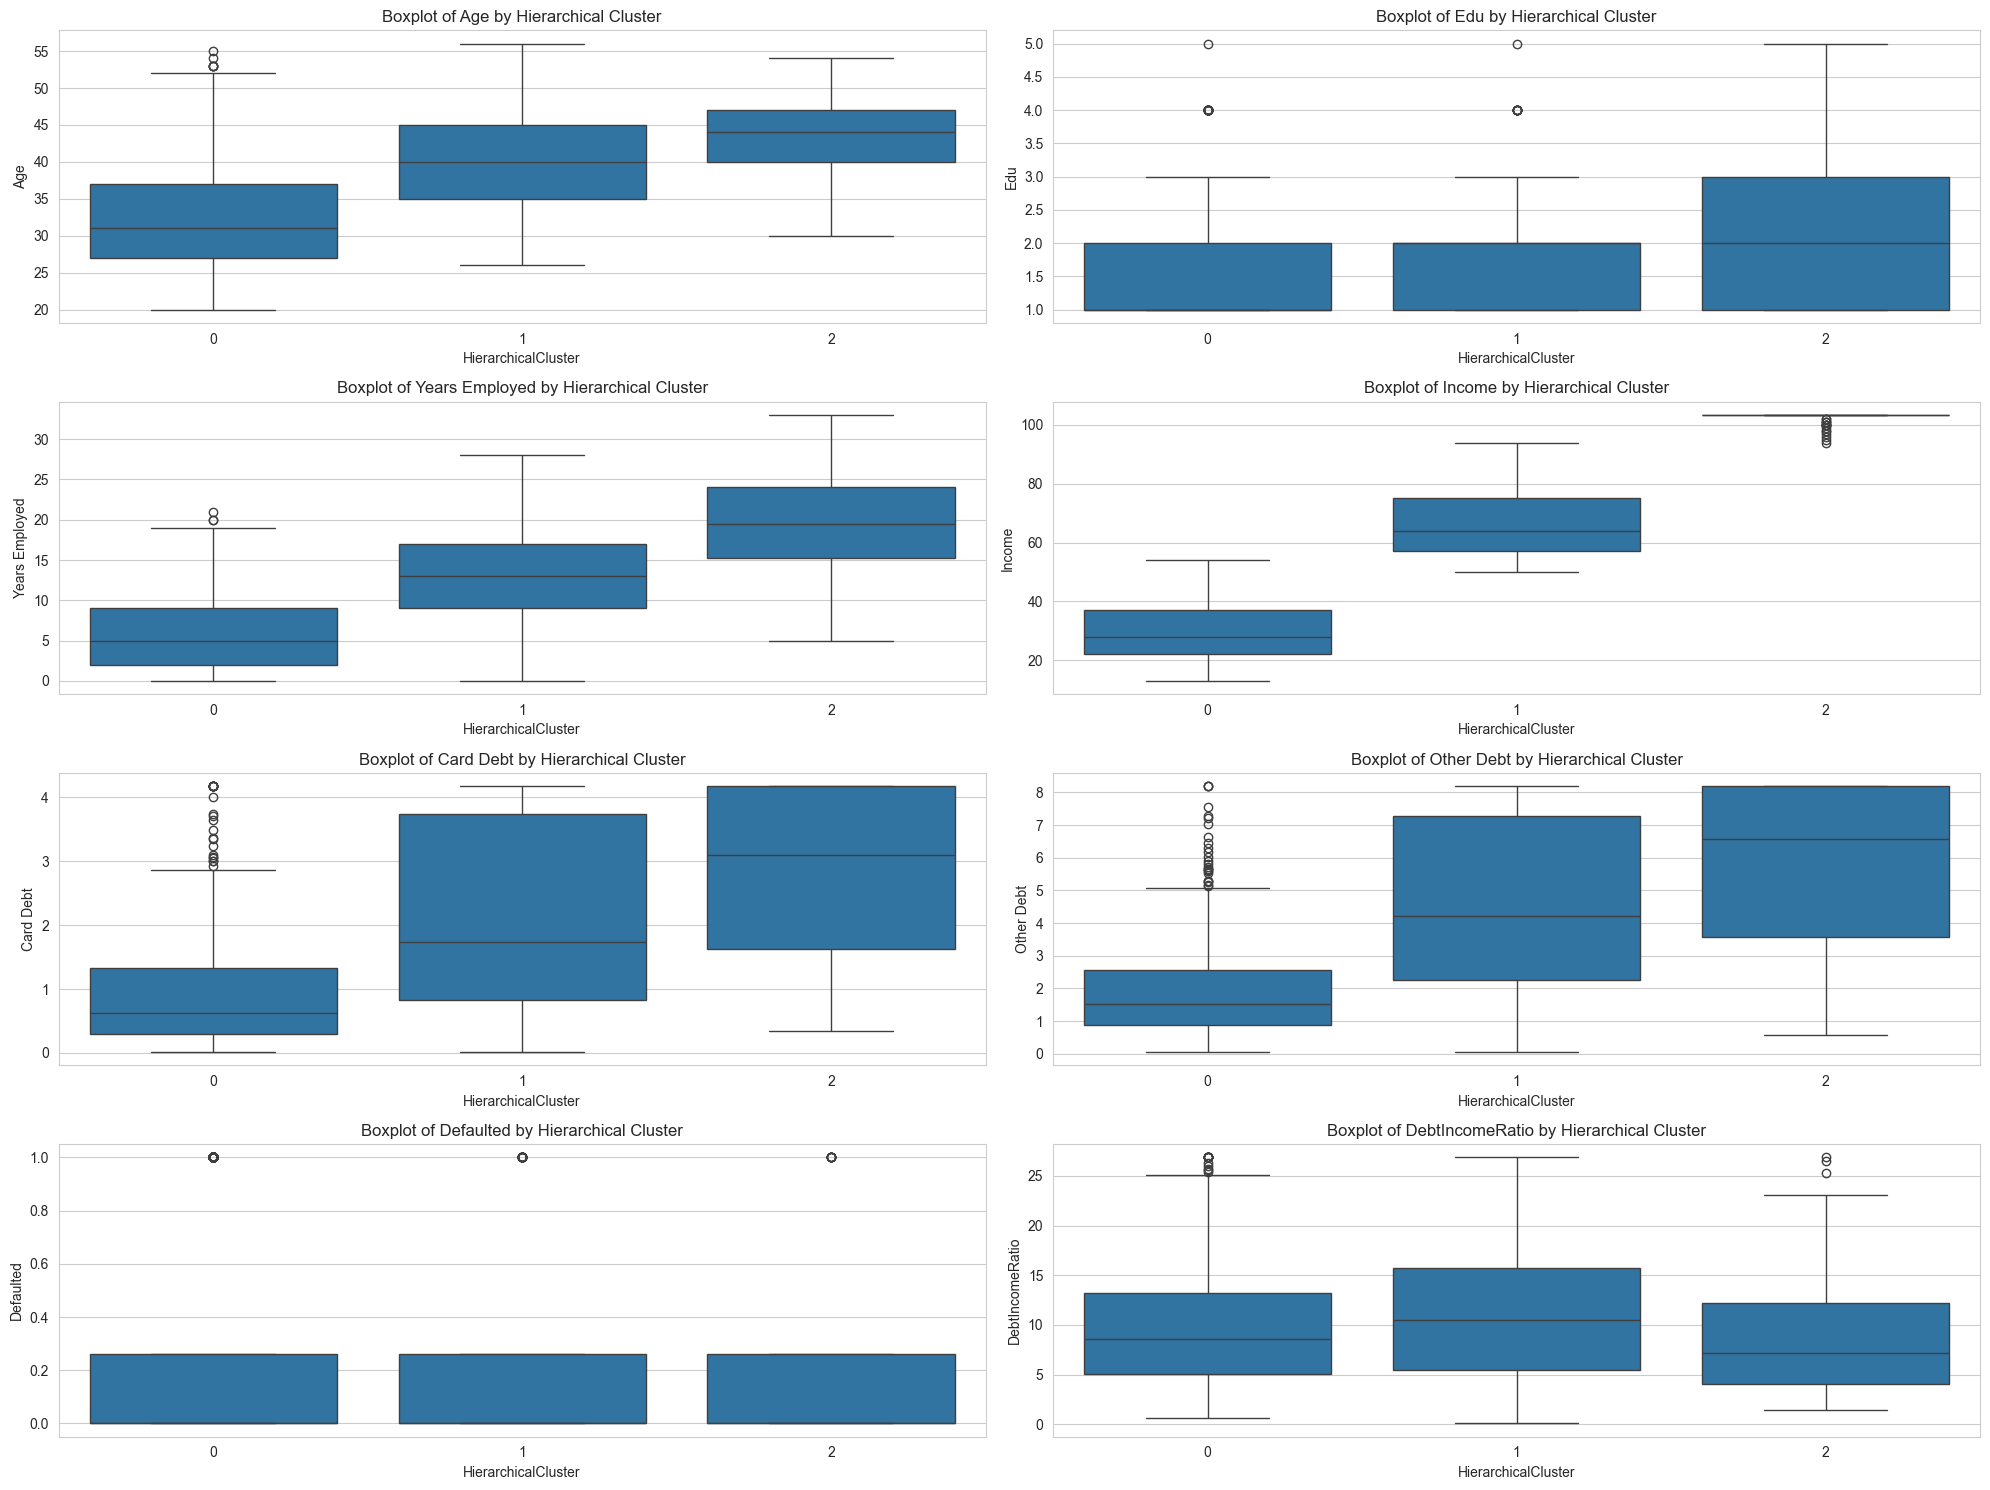

In [48]:
# Perform hierarchical clustering

# Selecting features for clustering
cluster_features = ['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio']

# Extracting the selected features from the DataFrame
cluster_data = df[cluster_features]

agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = agg_clustering.fit_predict(df)

# Add the cluster labels to the DataFrame
df['HierarchicalCluster'] = clusters

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Initialize the figure
plt.figure(figsize=(20, 15))

# Loop through each feature and create a subplot for each
for i, feature in enumerate(cluster_features, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x='HierarchicalCluster', y=feature, data=df)
    plt.title('Boxplot of ' + feature + ' by Hierarchical Cluster')

plt.tight_layout()
plt.show()

**Cluster 0**

Characteristics: This cluster seems to represent young individuals with lower years of employment and income levels. Their debt levels, both card and other debts, are relatively low, which might indicate cautious financial behavior or limited access to credit. The default rate is low, suggesting good financial management despite lower income.

Insight: Cluster 0 could represent young professionals or recent graduates who are early in their careers. They are cautious with their finances, possibly due to a lower disposable income.

**Cluster 1**

Characteristics:  They also have higher levels of debt, both card and other debts, but manage to maintain a relatively low default rate. This suggests that despite their higher debt levels, they have the financial literacy and income to manage and service their debts effectively.

Insight: Cluster 1 could be made up of middle-aged or senior professionals who have established careers. They likely prioritize financial stability and have a conservative approach to managing debt.

**Cluster 2**

Characteristics: Members of this cluster have higher levels of education and income compared to other clusters. They also have more years of employment compared to others. They also have higher levels of both card and other debt but maintain a low default rate and debt to income ration. 

Insight: Cluster 2 likely consists of well-educated, high-earning individuals who are comfortable with leveraging debt as part of their financial management strategy. They could be established professionals or individuals in high-paying jobs.

**Recommendations**

Cluster 0: Young Professionals or Recent Graduates

Recommendation: Market credit cards with features such as cashback on everyday purchases, low introductory interest rates, and educational resources on credit building. These offerings can appeal to their cautious financial behavior and support their financial growth.

Cluster 1: Established Professionals with Conservative Financial Behavior

Recommendation: Promote credit cards that offer investment rewards, higher savings rates, and benefits that match their interest in financial stability and growth. Cards that contribute to retirement funds or offer stock options might be particularly attractive.

Cluster 2: High Income Earners with High Debt and Low Default rates

Recommendation: Offer premium credit cards that provide benefits aligned with their lifestyle, such as travel rewards, higher credit limits, and exclusive access to events. Additionally, include features that help manage and consolidate debt, such as balance transfer options with low introductory rates.

